In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
X=iris.data
y=iris.target

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
X=X[:,2:]

In [10]:
X.shape

(150, 2)

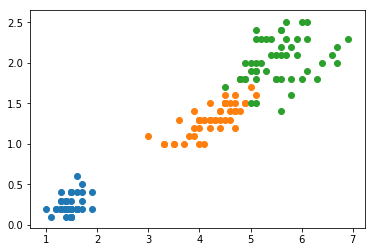

In [11]:
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt_clf = DecisionTreeClassifier(max_depth=2, criterion="entropy")

dt_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [14]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1,1)
    )
    
    X_new=np.c_[x0.ravel(), x1.ravel()]
    
    y_predict=model.predict(X_new)
    
    zz=y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    
    custom_cmap=ListedColormap(["#EF9A9A", "#FFF59D", "#90CAF9"])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

d:\users\user\anaconda3\envs\keras\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


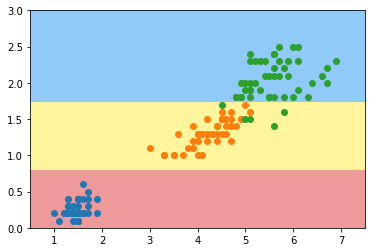

In [15]:
plot_decision_boundary(dt_clf, axis=[0.5, 7.5, 0, 3])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])
plt.scatter(X[y==2, 0], X[y==2, 1])
plt.show()

# 信息熵

In [16]:
def entropy(p):
    """
    二分类问题的信息熵
    """
    return -p*np.log(p)-(1-p)*np.log(1-p)

In [17]:
x_plot= np.linspace(0.01, 0.99, 200)
y_plot=entropy(x_plot)

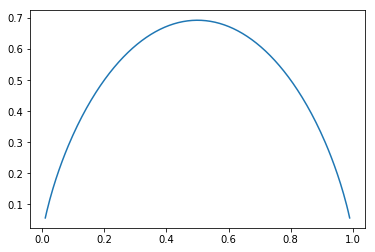

In [18]:
plt.plot(x_plot, y_plot)
plt.show()

# 模拟使用信息熵进行划分

In [20]:
def split(X, y ,d, value):
    """
    对数据集的特征d，按照阈值value进行划分
    """
    index_lt= (X[:, d]<=value)
    index_gt= (X[:,d]>value)
    return X[index_lt],X[index_gt],y[index_lt],y[index_gt]

In [21]:
from collections import Counter
def calculate_entropy(y):
    counter = Counter(y)
    res=0.0
    for num in counter.values():
        p=num/len(y)
        res += -p*np.log(p)
    return res

In [22]:
def try_split(X, y):
    best_entropy=float("inf")
    best_d, best_value= -1,-1
    
    for d in range(X.shape[1]):
        # 确定维度
        
        sorted_index = np.argsort(X[:,d])
        # 对数据的维度 d 进行排序，取得索引，不打乱原先的数据
        # 返回的是，从小到大，取值的索引
        
        for i in range(1,X.shape[0]):
            if X[sorted_index[i], d] != X[sorted_index[i-1], d]:
                value = (X[sorted_index[i], d] + X[sorted_index[i-1], d])/2
                # 取值从小到大排序
                # 阈值，取相邻两个值的均值
                
                X_lt, X_gt,y_lt,y_gt=split(X,y,d,value)
                # 以维度 d， 取值value进行划分
                
                # 由此划分得到的信息熵
                e = calculate_entropy(y_lt) + calculate_entropy(y_gt)
                
                if e<best_entropy:
                    best_entropy = e
                    best_d = d
                    best_value = value
    return best_entropy, best_d, best_value

In [24]:
best_entropy, best_d, best_value = try_split(X ,y)

In [25]:
best_entropy

0.69314718055994529

In [26]:
best_d

0

In [27]:
best_value

2.4500000000000002

In [28]:
X1_lt,X1_gt,y1_lt,y1_gt = split(X,y, best_d, best_value)

In [29]:
calculate_entropy(y1_lt)

0.0

In [30]:
calculate_entropy(y1_gt)

0.69314718055994529

## 经过这次划分，左边的熵为0，已经确定了，不用再划分。

## 可以继续对右边进行划分

In [31]:
best_entropy2, best_d2, best_value2 = try_split(X1_gt, y1_gt)

In [32]:
best_entropy2

0.41322788993619042

In [33]:
best_d2

1

In [34]:
best_value2

1.75

In [35]:
X2_lt,X2_gt,y2_lt,y2_gt = split(X1_gt, y1_gt, best_d2, best_value2)

In [36]:
calculate_entropy(y2_gt)

0.10473243910508653

In [37]:
calculate_entropy(y2_lt)

0.30849545083110386